[adaptado de [Programa de cursos integrados Aprendizado de máquina](https://www.coursera.org/specializations/machine-learning-introduction) de [Andrew Ng](https://www.coursera.org/instructor/andrewng)  ([Stanford University](http://online.stanford.edu/), [DeepLearning.AI](https://www.deeplearning.ai/) ) ]

In [ ]:
# Baixar arquivos adicionais para o laboratório
!wget https://github.com/fabiobento/dnn-course-2024-1/raw/main/00_course_folder/nn_adv/class_02/Laborat%C3%B3rios/lab_utils_ml_adv_week_2.zip
      
!unzip -n -q lab_utils_ml_adv_week_2.zip

In [13]:
# Testar se estamos no Google Colab
# Necessário para ativar widgets
try:
  import google.colab
  IN_COLAB = True
  from google.colab import output
  output.enable_custom_widget_manager()
except:
  IN_COLAB = False

# Classificação Multiclasse


## 1.1 Objetivos
Neste laboratório, você verá um exemplo de classificação multiclasse usando redes neurais.
<figure>
 <img src="./images/C2_W2_mclass_header.png"   style="width500px;height:200px;">
</figure>


## 1.2 Ferramentas
Você usará algumas rotinas de plotagem. Elas estão armazenadas em `lab_utils_multiclass_TF.py`, no diretório atual.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.set_printoptions(precision=2)
from lab_utils_multiclass_TF import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

# 2.0 Introdução a Classificação Multiclasse

As redes neurais são frequentemente usadas para classificar dados:
- recebem fotos e classificam os elementos das fotos como {cachorro, gato, cavalo, outro}
- receber uma frase e classificar as "classes gramaticais" de seus elementos: {substantivo, verbo, adjetivo etc.}  

Uma rede desse tipo terá várias unidades em sua camada final. Cada saída está associada a uma categoria. Quando um exemplo de entrada é aplicado à rede, a saída com o valor mais alto é a categoria prevista. Se a saída for aplicada a uma função softmax, a saída da softmax fornecerá as probabilidades de a entrada estar em cada categoria. 

Neste laboratório, você verá um exemplo de criação de uma rede multiclasse no Tensorflow. Em seguida, veremos como a rede neural faz suas previsões.

Vamos começar criando um conjunto de dados de quatro classes.

## 2.1 Preparar e visualizar nossos dados
Usaremos a função `make_blobs` do Scikit-Learn para criar um conjunto de dados de treinamento com 4 categorias, conforme mostrado no gráfico abaixo.

In [15]:
# Criar um conjunto de dados de 4 classes para classificação
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)

/workspace/00_course_folder/nn_adv/class_02/Laboratórios/lab_utils_multiclass_TF.py:85: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(


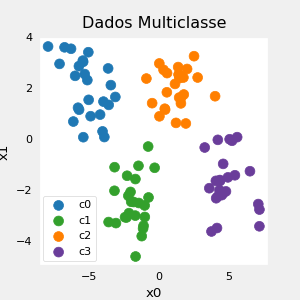

In [16]:
plt_mc(X_train,y_train,classes, centers, std=std)

Cada ponto representa um exemplo de treinamento. Os eixos (x0,x1) são as entradas e a cor representa a classe à qual o exemplo está associado. Depois de treinado, o modelo receberá um novo exemplo, (x0,x1), e fará a previsão da classe.  

Embora tenha sido gerado, esse conjunto de dados é representativo de muitos problemas de classificação do mundo real. Há vários recursos de entrada (x0,...,xn) e várias categorias de saída. O modelo é treinado para usar os recursos de entrada para prever a categoria de saída correta.

In [17]:
# mostrar classes no conjunto de dados
print(f"classes únicas {np.unique(y_train)}")
# Mostrar como as classes são representadas
print(f"representação de classe {y_train[:10]}")
# Mostrar o formato de nosso conjunto de dados
print(f"formarto de X_train: {X_train.shape}, formato de y_train: {y_train.shape}")

classes únicas [0 1 2 3]
representação de classe [3 3 3 0 3 3 3 3 2 0]
formarto de X_train: (100, 2), formato de y_train: (100,)


## 2.2 Modelo
<img align="Right" src="./images/C2_W2_mclass_lab_network.PNG"  style=" width:350px; padding: 10px 20px ; ">
Este laboratório usará uma rede de duas camadas, conforme mostrado.
Diferentemente das redes de classificação binária, esta rede tem quatro saídas, uma para cada classe. Dado um exemplo de entrada, a saída com o valor mais alto é a classe prevista da entrada.   

Abaixo está um exemplo de como construir essa rede no Tensorflow. Observe que a camada de saída usa uma ativação `linear` em vez de `softmax`. Embora seja possível incluir o softmax na camada de saída, é mais estável numericamente se as saídas lineares forem passadas para a função de perda durante o treinamento. Se o modelo for usado para prever probabilidades, o softmax poderá ser aplicado nesse ponto.

In [18]:
tf.random.set_seed(1234)  # aplicado para obter resultados consistentes
model = Sequential(
    [
        Dense(2, activation = 'relu',   name = "L1"),
        Dense(4, activation = 'linear', name = "L2")
    ]
)

As instruções abaixo compilam e treinam a rede. A definição de `from_logits=True` como argumento para a função de perda especifica que a ativação de saída foi linear em vez de um softmax.

In [19]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

model.fit(
    X_train,y_train,
    epochs=200
)

Epoch 1/200
4/4 [==============================] - 0s 2ms/step - loss: 2.2772
Epoch 2/200
4/4 [==============================] - 0s 1ms/step - loss: 1.9907
Epoch 3/200
4/4 [==============================] - 0s 1ms/step - loss: 1.8049
Epoch 4/200
4/4 [==============================] - 0s 1ms/step - loss: 1.6168
Epoch 5/200
4/4 [==============================] - 0s 1ms/step - loss: 1.4983
Epoch 6/200
4/4 [==============================] - 0s 1ms/step - loss: 1.4101
Epoch 7/200
4/4 [==============================] - 0s 1ms/step - loss: 1.3341
Epoch 8/200
4/4 [==============================] - 0s 1ms/step - loss: 1.2757
Epoch 9/200
4/4 [==============================] - 0s 1ms/step - loss: 1.2251
Epoch 10/200
4/4 [==============================] - 0s 1ms/step - loss: 1.1809
Epoch 11/200
4/4 [==============================] - 0s 1ms/step - loss: 1.1393
Epoch 12/200
4/4 [==============================] - 0s 2ms/step - loss: 1.1023
Epoch 13/200
4/4 [==============================] - 0s 1ms/st

Com o modelo treinado, podemos ver como o modelo classificou os dados de treinamento.

184/184 [==============================] - 0s 492us/step


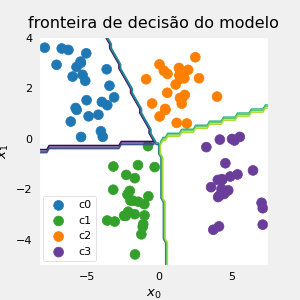

In [20]:
plt_cat_mc(X_train, y_train, model, classes)

Acima, os limites de decisão mostram como o modelo dividiu o espaço de entrada.  Esse modelo muito simples não teve problemas para classificar os dados de treinamento. Como ele conseguiu isso? Vamos examinar a rede em mais detalhes. 

Abaixo, extrairemos os pesos treinados do modelo e os usaremos para representar graficamente a função de cada uma das unidades da rede. Mais abaixo, há uma explicação mais detalhada dos resultados. Você não precisa conhecer esses detalhes para usar redes neurais com sucesso, mas pode ser útil para obter mais intuição sobre como as camadas se combinam para resolver um problema de classificação.

In [21]:
# Obter os parâmetros treinados da primeira camada
l1 = model.get_layer("L1")
W1,b1 = l1.get_weights()

/workspace/00_course_folder/nn_adv/class_02/Laboratórios/lab_utils_multiclass_TF.py:85: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(
/workspace/00_course_folder/nn_adv/class_02/Laboratórios/lab_utils_multiclass_TF.py:85: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(


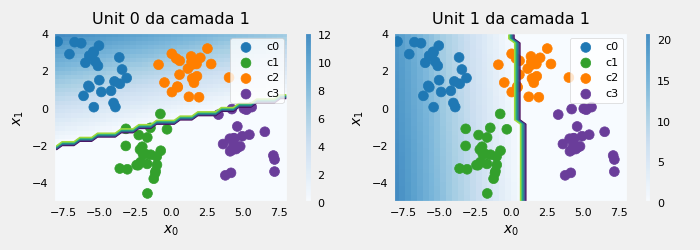

In [22]:
# plotar a função da primeira camada
plt_layer_relu(X_train, y_train.reshape(-1,), W1, b1, classes)

/workspace/00_course_folder/nn_adv/class_02/Laboratórios/lab_utils_multiclass_TF.py:85: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(
/workspace/00_course_folder/nn_adv/class_02/Laboratórios/lab_utils_multiclass_TF.py:85: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(
/workspace/00_course_folder/nn_adv/class_02/Laboratórios/lab_utils_multiclass_TF.py:85: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(
/workspace/00_course_folder/nn_adv/class_02/Laboratórios/lab_utils_multiclass_TF.py:85: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(


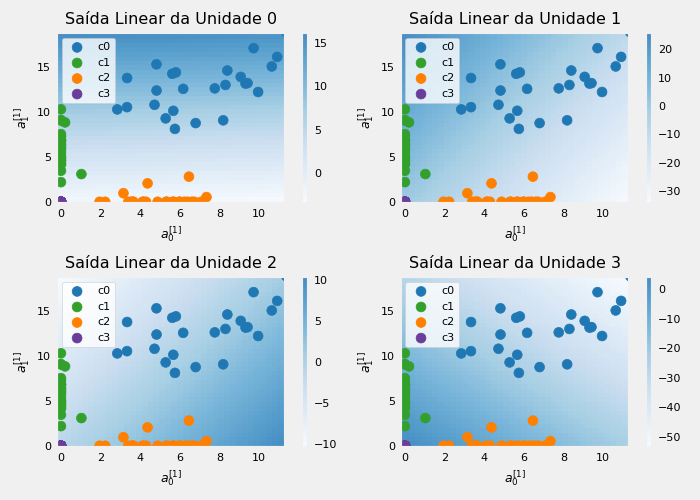

In [23]:
# Reunir os parâmetros treinados da camada de saída
l2 = model.get_layer("L2")
W2, b2 = l2.get_weights()
# Criar os "novos recursos", os exemplos de treinamento após a transformação L1
Xl2 = np.maximum(0, np.dot(X_train,W1) + b1)

plt_output_layer_linear(Xl2, y_train.reshape(-1,), W2, b2, classes,
                        x0_rng = (-0.25,np.amax(Xl2[:,0])), x1_rng = (-0.25,np.amax(Xl2[:,1])))

## Explicação
#### Camada 1 <img align="Right" src="./images/C2_W2_mclass_layer1.png"  style=" width:600px; padding: 10px 20px ; ">
Esses gráficos mostram a função das unidades 0 e 1 na primeira camada da rede. As entradas são ($x_0,x_1$) no eixo. A saída da unidade é representada pela cor do plano de fundo. Isso é indicado pela barra de cores à direita de cada gráfico. Observe que, como essas unidades estão usando um ReLu, as saídas não ficam necessariamente entre 0 e 1 e, nesse caso, são maiores que 20 em seus picos. 
As linhas de contorno nesse gráfico mostram o ponto de transição entre a saída, $a^{[1]}_j$ sendo zero e diferente de zero. Lembre-se do gráfico de um ReLu :<img align="right" src="./images/C2_W2_mclass_relu.png"  style=" width:200px; padding: 10px 20px ; "> A linha de contorno no gráfico é o ponto de inflexão no ReLu.

A Unidade 0 separou as classes 0 e 1 das classes 2 e 3. Os pontos à esquerda da linha (classes 0 e 1) produzirão zero, enquanto os pontos à direita produzirão um valor maior que zero.  
A Unidade 1 separou as classes 0 e 2 das classes 1 e 3. Os pontos acima da linha (classes 0 e 2) produzirão um zero, enquanto os pontos abaixo produzirão um valor maior que zero. Vamos ver como isso funciona na próxima camada!

#### Camada 2, a camada de saída  <img align="Right" src="./images/C2_W2_mclass_layer2.png"  style=" width:600px; padding: 10px 20px ; ">

Os pontos nesses gráficos são os exemplos de treinamento traduzidos pela primeira camada. Uma maneira de pensar nisso é que a primeira camada criou um novo conjunto de recursos para avaliação pela segunda camada. Os eixos nesses gráficos são as saídas da camada anterior $a^{[1]}_0$ e $a^{[1]}_1$. Conforme previsto acima, as classes 0 e 1 (azul e verde) têm $a^{[1]}_0 = 0$, enquanto as classes 0 e 2 (azul e laranja) têm $a^{[1]}_1 = 0$.  
Mais uma vez, a intensidade da cor de fundo indica os valores mais altos.  
A unidade 0 produzirá seu valor máximo para valores próximos a (0,0), onde a classe 0 (azul) foi mapeada.    
A unidade 1 produz seus valores mais altos no canto superior esquerdo, selecionando a classe 1 (verde).  
A unidade 2 tem como alvo o canto inferior direito, onde reside a classe 2 (laranja).  
A unidade 3 produz seus valores mais altos no canto superior direito, selecionando nossa classe final (roxo).  

Um outro aspecto que não é óbvio nos gráficos é que os valores foram coordenados entre as unidades. Não basta que uma unidade produza um valor máximo para a classe que está selecionando, ela também deve ser o valor mais alto de todas as unidades para os pontos dessa classe. Isso é feito pela função softmax implícita que faz parte da função de perda (`SparseCategoricalCrossEntropy`). Ao contrário de outras funções de ativação, a softmax funciona em todos os outputs.

Você pode usar redes neurais com sucesso sem conhecer os detalhes do que cada unidade está fazendo. Esperamos que este exemplo tenha fornecido alguma intuição sobre o que está acontecendo nos bastidores.

## Parabéns!
Você aprendeu a criar e operar uma rede neural para classificação multiclasse.
